In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import seaborn as sns

In [2]:
df=pd.read_csv('studentsperf.csv')

In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# HISTOGRAMA

<AxesSubplot:xlabel='writing score', ylabel='Count'>

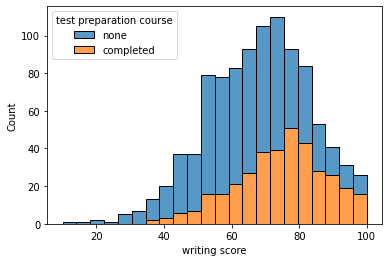

In [10]:
#parametros de division con atributo hue, multiple en stack define la separacion de los dos histogramas
#para poder visualozar de manera comoda
sns.histplot(data=df, x='writing score', hue='test preparation course', multiple='stack')

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

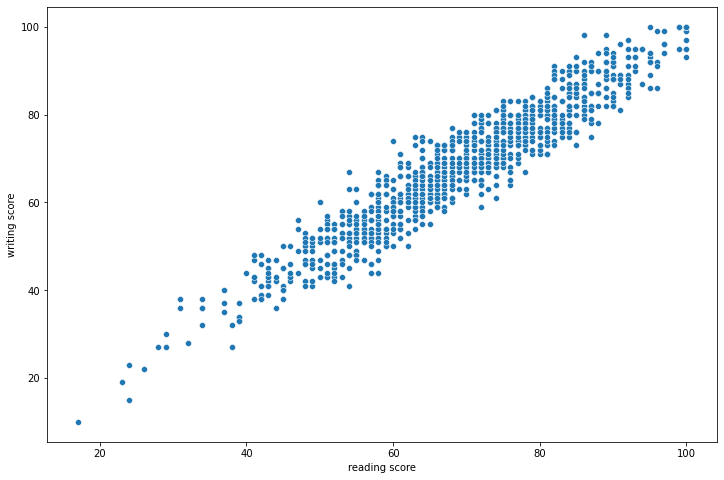

In [15]:
#visualizar la relacion entre las variables
fig=plt.subplots(figsize=(12,8))
sns.scatterplot(data=df, x='reading score', y='writing score')
# Esto es el resultado de la relacion que existe entre las variables 

In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## CREANDO UNA TABLA DE FRECUENCIAS

In [16]:
freq=df['writing score'].value_counts()

In [20]:
#generar tabla con metodo to_frame
#para que tome los indices como una columna se debe usar el argumento
df_freq=freq.to_frame()
#resetear los indices y usarlos como argumento para una columna
df_freq.reset_index(inplace=True)
#cambiar los nombres de columnas
df_freq=df_freq.rename(columns={'index':'riting score', 'riting score':'conteo de estudiante'})

In [21]:
df_freq

,riting score,writing score
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### CALCULO DE MEDIA Y MEDIANA
<p>LA HIPOSTESIS QUE SUPONEMOS: Que si obtiene un buen puntaje en el test de lectura tiene un mayor puntaje en el test de escritura</p>

In [22]:
#calculo de media
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [23]:
#calculo de mediana
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

# INICIANDO MODELO DE REGRESION
### En este ejemplo considerando la hipotesis 'x' es el puntaje de lectura y 'y' es el puntaje de escritura


In [27]:
#definir las variables 
X=df['reading score'].values.reshape(-1,1)
Y=df['writing score'].values.reshape(-1,1)

In [29]:
#usar la funcion de sklear para generar el df de test y train
from sklearn.model_selection import train_test_split
#definir las variables de train y test
#en este caso es el 20% de datos para test y el 80% para train
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

In [30]:
#llamar al objeto de sklear
from sklearn.linear_model import LinearRegression
#generar el regresor por convencion se usa reg
reg=LinearRegression()
#entrenat la regresion usando las variables definidad de train
reg.fit(X_train, Y_train)
#inprimier el intercepto o bias, y la pendiente

print(f'este es el valor de la pendiente: {reg.coef_}')
print(f'este es el bias o intercepto{reg.intercept_}')

este es el valor de la pendiente: [[0.99500203]]
este es el bias o intercepto[-0.64214046]


In [31]:
#los valores de pendiente e intercepto son los valores que definen la prediccion
#verificar el punto de relacion entre las varibles
print(reg.score(X_train, Y_train))

0.9111332595643985


### VISUALIZAR LA PREDICCION DE LOS DATOS

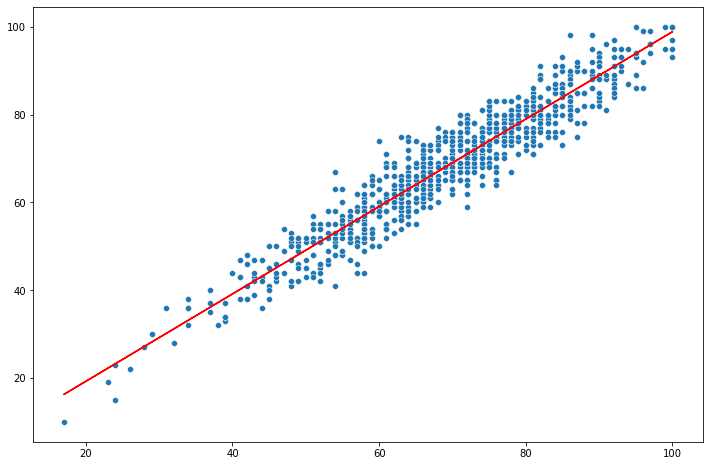

In [34]:
#grafica en scatter con datos de entrenamiento
#metodo para convertir el reshape en una lista para poder graficas
x_flat=X_train.flatten()
y_flat=Y_train.flatten()
#graficar la curva de la prediccion
y_predi=reg.predict(X_train)

fig, ax=plt.subplots(figsize=(12,8))

sns.scatterplot(x=x_flat, y=y_flat)
#graficar la linea de prediccion
plt.plot(X_train, y_predi, color='r')

## EVALUANDO EL MODELO

In [35]:
#se pueden usar los metodos propios de sklearn
from sklearn.metrics import mean_squared_error
#debe usar el y de prediccion apra verificar el error
y_predic=reg.predict(X_test)
#caculo del error cuadrado medio
print(mean_squared_error(Y_test, y_predic))


21.678980819431573


In [39]:
#generar un dataframe entre los valores de prediccion y los de test

df_prediccion=pd.DataFrame({
    'Valores_prediccion':y_predic.flatten(),
    'Valores_reales':Y_test.flatten()
})

In [40]:
df_prediccion

,Valores_prediccion,Valores_reales
0,78.958022,80
1,70.003004,73
2,30.202923,38
3,78.958022,71
4,47.117957,46
...,...,...
195,67.017998,64
196,97.863061,100
197,80.948026,74
198,70.998006,74
